In [42]:
import numpy as np
import pandas as pd
import datetime as datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
FACT_InternetSales = pd.read_excel('C:/Users/sekha/Documents/Karthik/Data Science/Data For Projects/Alabs Projects/Business Demand Overview User Stories/data/Processed Data/FACT_InternetSales.xlsx')
DIM_Customers = pd.read_excel('C:/Users/sekha/Documents/Karthik/Data Science/Data For Projects/Alabs Projects/Business Demand Overview User Stories/data/Processed Data/DIM_Customer.xlsx')
DIM_Products = pd.read_excel('C:/Users/sekha/Documents/Karthik/Data Science/Data For Projects/Alabs Projects/Business Demand Overview User Stories/data/Processed Data/DIM_Product.xlsx')
DIM_Calendar = pd.read_excel('C:/Users/sekha/Documents/Karthik/Data Science/Data For Projects/Alabs Projects/Business Demand Overview User Stories/data/Processed Data/DIM_Calendar.xlsx')
SalesBudget =  pd.read_excel('C:/Users/sekha/Documents/Karthik/Data Science/Data For Projects/Alabs Projects/Business Demand Overview User Stories/data/Processed Data/SalesBudget.xlsx')

# Understanding Data

## Sales Table

In [44]:
# shape of sales table
FACT_InternetSales.shape

(58168, 7)

In [45]:
FACT_InternetSales.columns

Index(['ProductKey', 'OrderDateKey', 'DueDateKey', 'ShipDateKey',
       'CustomerKey', 'SalesOrderNumber', 'SalesAmount'],
      dtype='object')

In [46]:
# Total transactions
FACT_InternetSales['SalesOrderNumber'].count()

58168

In [47]:
# Total unique transactions
FACT_InternetSales['SalesOrderNumber'].nunique()

25429

In [48]:
FACT_InternetSales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58168 entries, 0 to 58167
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ProductKey        58168 non-null  int64  
 1   OrderDateKey      58168 non-null  int64  
 2   DueDateKey        58168 non-null  int64  
 3   ShipDateKey       58168 non-null  int64  
 4   CustomerKey       58168 non-null  int64  
 5   SalesOrderNumber  58168 non-null  object 
 6   SalesAmount       58168 non-null  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 3.1+ MB


## products Table

In [49]:
DIM_Products.head(4)

,ProductKey,ProductItemCode,Product Name,Sub Category,Product Category,Product Color,Product Size,Product Line,Product Model Name,Product Description,Product Status
0,1,AR-5381,Adjustable Race,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Current
1,2,BA-8327,Bearing Ball,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Current
2,3,BE-2349,BB Ball Bearing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Current
3,4,BE-2908,Headset Ball Bearings,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Current


In [50]:
# Total products available
DIM_Products['ProductKey'].nunique()

606

In [51]:
#  Product categories available
DIM_Products[DIM_Products['Product Category'].notnull()]['Product Category'].unique()

array(['Components', 'Accessories', 'Clothing', 'Bikes'], dtype=object)

In [52]:
# Product sub-categories available
DIM_Products[DIM_Products['Sub Category'].notnull()]['Sub Category'].unique()

array(['Road Frames', 'Helmets', 'Socks', 'Caps', 'Jerseys',
       'Mountain Frames', 'Road Bikes', 'Mountain Bikes', 'Forks',
       'Headsets', 'Handlebars', 'Wheels', 'Shorts', 'Panniers', 'Locks',
       'Pumps', 'Lights', 'Tights', 'Bib-Shorts', 'Gloves', 'Vests',
       'Bottles and Cages', 'Tires and Tubes', 'Bike Racks', 'Cleaners',
       'Fenders', 'Bike Stands', 'Hydration Packs', 'Touring Frames',
       'Derailleurs', 'Brakes', 'Saddles', 'Pedals', 'Cranksets',
       'Chains', 'Touring Bikes', 'Bottom Brackets'], dtype=object)

In [53]:
DIM_Products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ProductKey           606 non-null    int64 
 1   ProductItemCode      606 non-null    object
 2   Product Name         606 non-null    object
 3   Sub Category         397 non-null    object
 4   Product Category     397 non-null    object
 5   Product Color        352 non-null    object
 6   Product Size         299 non-null    object
 7   Product Line         380 non-null    object
 8   Product Model Name   397 non-null    object
 9   Product Description  396 non-null    object
 10  Product Status       606 non-null    object
dtypes: int64(1), object(10)
memory usage: 52.2+ KB


## Customers Table

In [54]:
DIM_Customers.head(5)

,CustomerKey,First Name,Last Name,Full Name,Gender,DateFirstPurchase,Customer City
0,11000,Jon,Yang,Jon Yang,Male,2018-01-19,Rockhampton
1,11001,Eugene,Huang,Eugene Huang,Male,2018-01-15,Seaford
2,11002,Ruben,Torres,Ruben Torres,Male,2018-01-07,Hobart
3,11003,Christy,Zhu,Christy Zhu,Female,2017-12-29,North Ryde
4,11004,Elizabeth,Johnson,Elizabeth Johnson,Female,2018-01-23,Wollongong


In [55]:
DIM_Customers['CustomerKey'].count()

18484

In [56]:
DIM_Customers['CustomerKey'].nunique()

18484

In [57]:
DIM_Customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18484 entries, 0 to 18483
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   CustomerKey        18484 non-null  int64         
 1   First Name         18484 non-null  object        
 2   Last Name          18484 non-null  object        
 3   Full Name          18484 non-null  object        
 4   Gender             18484 non-null  object        
 5   DateFirstPurchase  18484 non-null  datetime64[ns]
 6   Customer City      18484 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 1011.0+ KB


# Total Transactions and Sales Amount Analysis wrt Time

## Total Transactions

In [58]:
FACT_InternetSales['SalesOrderNumber'].nunique()

25429

## Total Sale Amount

In [59]:
FACT_InternetSales['SalesAmount'].sum()

22239730.2552

## Joining of Sales and Date table

In [60]:
sales_date_tbl = FACT_InternetSales.merge(
                                        DIM_Calendar,
                                        left_on=FACT_InternetSales['OrderDateKey'],
                                        right_on=DIM_Calendar['DateKey'],
                                        suffixes=('sales','date'),
                                        how = 'left')[
                                                        ['OrderDateKey','Date','Year','Month','MonthNo','Quarter','SalesOrderNumber','SalesAmount','ProductKey','CustomerKey']
                                                     ]
sales_date_tbl.head(5)

,OrderDateKey,Date,Year,Month,MonthNo,Quarter,SalesOrderNumber,SalesAmount,ProductKey,CustomerKey
0,20190101,2019-01-01,2019,January,1,1,SO46700,1000.4375,381,16942
1,20190101,2019-01-01,2019,January,1,1,SO46701,2181.5625,375,15114
2,20190101,2019-01-01,2019,January,1,1,SO46702,2443.3500,369,15116
3,20190101,2019-01-01,2019,January,1,1,SO46703,782.9900,337,20576
4,20190101,2019-01-01,2019,January,1,1,SO46704,2443.3500,370,13059


## Total transactions and SaleAmount distribution across years

In [61]:
interim_df = sales_date_tbl.groupby(by = ['Year']).agg(
                                                        Total_SaleAmount = ('SalesAmount',pd.Series.sum),
                                                        Total_Transactions = ('SalesOrderNumber',pd.Series.nunique)
                                                    ).round(decimals = 2).reset_index()
interim_df

,Year,Total_SaleAmount,Total_Transactions
0,2019,5842485.20,3269
1,2020,16351550.34,21289
2,2021,45694.72,871


## Total transactions and SaleAmount distribution across years and months

In [62]:
interim_df = sales_date_tbl.resample(
                                     rule = 'M', on= 'Date'
                                    ).agg(
                                            Total_SaleAmount = ('SalesAmount',pd.Series.sum),
                                            Total_Transactions = ('SalesOrderNumber',pd.Series.nunique)
                                         ).round(
                                                 decimals = 2
                                                ).reset_index()


interim_df['Date'] = interim_df['Date'].apply(lambda x: x.strftime('%Y-%B'))

interim_df

,Date,Total_SaleAmount,Total_Transactions
0,2019-January,495364.13,252
1,2019-February,506994.19,260
2,2019-March,373483.01,212
3,2019-April,400335.61,219
4,2019-May,358877.89,207
5,2019-June,555160.14,318
6,2019-July,444558.23,246
7,2019-August,523917.38,294
8,2019-September,486177.45,269
9,2019-October,535159.48,313


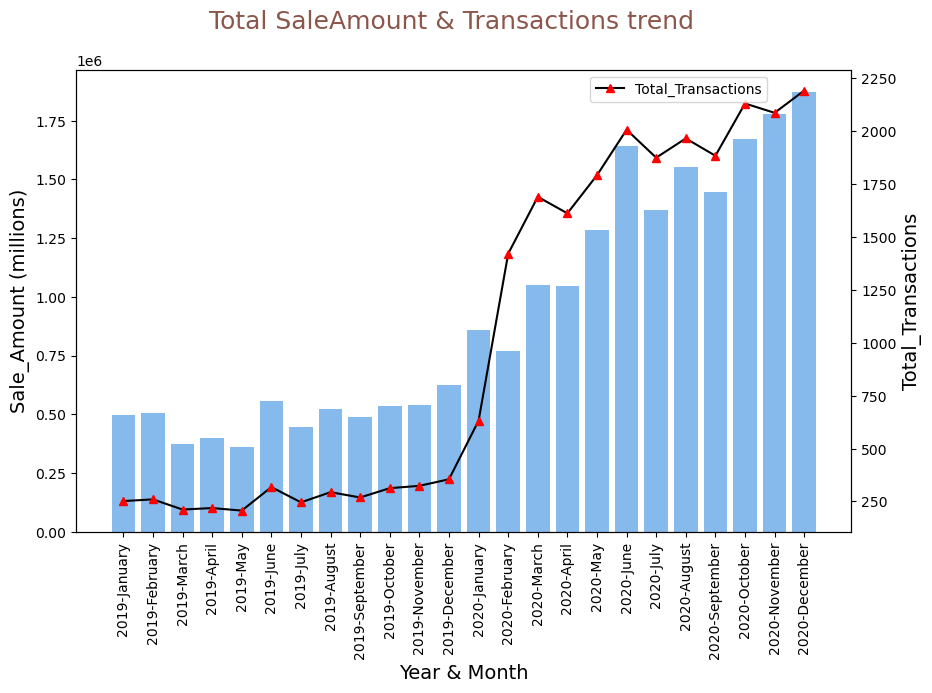

In [63]:
fig,ax = plt.subplots(figsize = (10,6))

# step - filtering out 2021 data as data is incomplete for 2021
interim_df = interim_df[~(interim_df['Date'] == '2021-January')]

# step - creation of barchart for Saleamount over time 
sns.barplot(
            x = interim_df['Date'],
            y = interim_df['Total_SaleAmount'],
            color = 'xkcd:sky blue'
           )
# step - creation of secondary axis
ax2 = ax.twinx()
# step - creation of line plot on secondary axis
ax2.plot(
            interim_df['Date'],
            interim_df['Total_Transactions'],
            color = 'black',
            marker= '^',
            markerfacecolor = "red",
            markeredgecolor = 'red'
        )

#step - Formatting the chart elements
ax.set_xlabel('Year & Month',fontsize = 14)
ax.set_ylabel('Sale_Amount (millions)',fontsize = 14)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

ax2.set_ylabel('Total_Transactions',fontsize = 14)
ax2.legend(['Total_Transactions'],bbox_to_anchor = (0.9,1))

#step - Formatting the figure elements
fig.suptitle('Total SaleAmount & Transactions trend',color = 'tab:brown',size = 18)

plt.show()


## Month on Month change in SaleAmount and Transactions

In [64]:
# step - Resampling sales data to month level and aggregation of data
interim_df = sales_date_tbl.resample(
                                     rule = 'M', on= 'Date'
                                    ).agg(
                                            SaleAmount = ('SalesAmount',pd.Series.sum),
                                            Transactions = ('SalesOrderNumber',pd.Series.nunique)
                                         ).round(
                                                 decimals = 2
                                                )

# step - attaching SaleAmount percentage change column and resetting the index
SaleAmount_MOMchange = interim_df[
                                    ['SaleAmount']
                                 ].assign(
                                            SaleAmount_PctChange = interim_df['SaleAmount'].pct_change(periods=1)*100
                                         ).reset_index()
# step - converting the date into year-month format
SaleAmount_MOMchange['Date'] = SaleAmount_MOMchange['Date'].dt.strftime('%Y-%B')


# step - attaching transactions percentage change column and resetting the index
Transactions_MOMchange = interim_df[
                                    ['Transactions']
                                   ].assign(
                                            Tranactions_PctChange = interim_df['Transactions'].pct_change(periods=1)*100
                                            ).reset_index()

# step - converting the date into year-month format
Transactions_MOMchange['Date'] = Transactions_MOMchange['Date'].dt.strftime('%Y-%B')

In [65]:
SaleAmount_MOMchange.head(5)

,Date,SaleAmount,SaleAmount_PctChange
0,2019-January,495364.13,NaN
1,2019-February,506994.19,2.347780
2,2019-March,373483.01,-26.333868
3,2019-April,400335.61,7.189778
4,2019-May,358877.89,-10.355741


In [66]:
Transactions_MOMchange.head(5)

,Date,Transactions,Tranactions_PctChange
0,2019-January,252,NaN
1,2019-February,260,3.174603
2,2019-March,212,-18.461538
3,2019-April,219,3.301887
4,2019-May,207,-5.479452


C:\Users\sekha\AppData\Local\Temp\ipykernel_32032\432762738.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


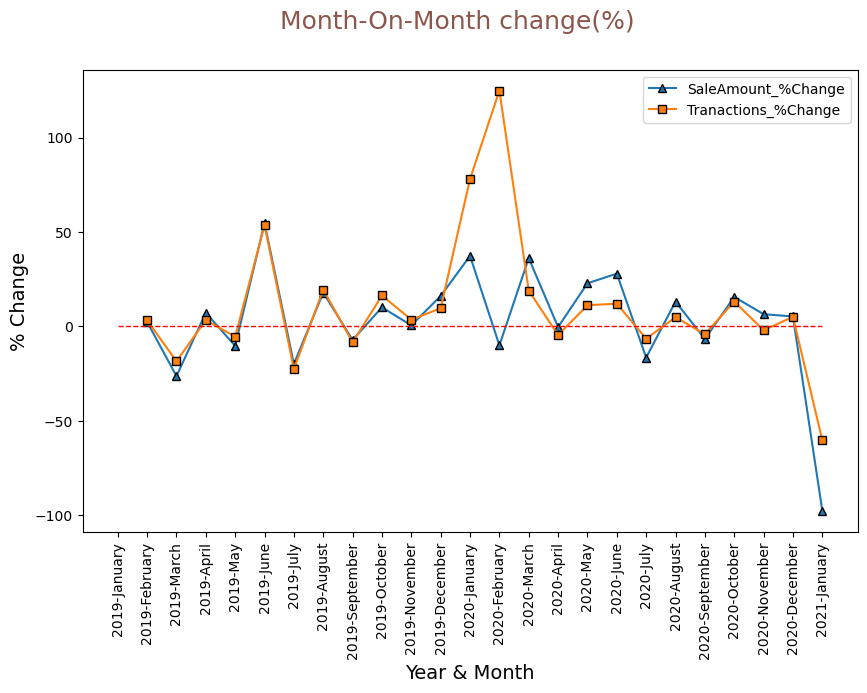

In [67]:
fig,ax = plt.subplots(figsize = (10,6))
#step - Creation of SaleAmount percentage change line
ax.plot(SaleAmount_MOMchange['Date'],SaleAmount_MOMchange['SaleAmount_PctChange'],marker = '^',markeredgecolor = 'black')

#step - Creation of Transactions percentage change line
ax.plot(Transactions_MOMchange['Date'],Transactions_MOMchange['Tranactions_PctChange'],marker = 's',markeredgecolor = 'black')

#step - creation of horizontal line to indicate zero line
ax.hlines(y = 0,xmin='2019-January',xmax = '2021-January',linestyle = '--',color = 'red',linewidths = 1)

#step - Formatting the chart elements
ax.set_ylabel('% Change',fontsize = 14)
ax.set_xlabel('Year & Month',fontsize = 14)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

ax.legend(['SaleAmount_%Change','Tranactions_%Change'])

#step - Formatting the figure elements
fig.suptitle('Month-On-Month change(%)',color = 'tab:brown',size = 18)

plt.show()

## current SaleAmount comparison with SaleAmount of same month previous year 

In [68]:
# step - Resampling sales data to month level and aggregation of data
interim_df = sales_date_tbl.resample(
                                     rule = 'M', on= 'Date'
                                    ).agg(
                                            SaleAmount = ('SalesAmount',pd.Series.sum)
                                         ).round(
                                                 decimals = 2
                                                )

# step - separating the SaleAmount data of two years 2019 and 2020
SaleAmount_2019 = interim_df[interim_df.index.year == 2019].reset_index()
SaleAmount_2020 = interim_df[interim_df.index.year == 2020].reset_index()

# step - Joining the 2020 and 2019 SaleAmount Data
SameMonthLastYear_SA = SaleAmount_2020.merge(
                                            SaleAmount_2019,
                                            how='inner',
                                            left_index=True,
                                            right_index=True,
                                            suffixes=('_2020','_2019')
                                            )

# step - Attaching percentage change 
SameMonthLastYear_SA.assign(
                            SMLY_PctChange = ((SameMonthLastYear_SA['SaleAmount_2020']-SameMonthLastYear_SA['SaleAmount_2019'])*100/(SameMonthLastYear_SA['SaleAmount_2019']))
                        )

,Date_2020,SaleAmount_2020,Date_2019,SaleAmount_2019,SMLY_PctChange
0,2020-01-31,857689.91,2019-01-31,495364.13,73.143322
1,2020-02-29,771348.74,2019-02-28,506994.19,52.141534
2,2020-03-31,1049907.39,2019-03-31,373483.01,181.112490
3,2020-04-30,1046022.77,2019-04-30,400335.61,161.286467
4,2020-05-31,1284592.93,2019-05-31,358877.89,257.947081
5,2020-06-30,1643177.78,2019-06-30,555160.14,195.982665
6,2020-07-31,1371675.81,2019-07-31,444558.23,208.548064
7,2020-08-31,1551065.56,2019-08-31,523917.38,196.051557
8,2020-09-30,1447495.69,2019-09-30,486177.45,197.729911
9,2020-10-31,1673293.41,2019-10-31,535159.48,212.671918


## current Total_Transactions comparison with transactions of Same month previous year 

In [69]:
# step - Resampling sales data to month level and aggregation of data
interim_df = sales_date_tbl.resample(
                                     rule = 'M', on= 'Date'
                                    ).agg(
                                            Transactions = ('SalesOrderNumber',pd.Series.nunique)
                                         ).round(
                                                 decimals = 2
                                                )

# step - separating the Transactions data of two years 2019 and 2020
Transactions_2019 = interim_df[interim_df.index.year == 2019].reset_index()
Transactions_2020 = interim_df[interim_df.index.year == 2020].reset_index()

# step - Joining the 2020 and 2019 Transactions Data
SameMonthLastYear_T = Transactions_2020.merge(
                                            Transactions_2019,
                                            how='inner',
                                            left_index=True,
                                            right_index=True,
                                            suffixes=('_2020','_2019')
                                            )

# Step- Attaching percentage change 
SameMonthLastYear_T.assign(
                            SMLY_PctChange = ((SameMonthLastYear_T['Transactions_2020']-SameMonthLastYear_T['Transactions_2019'])*100/(SameMonthLastYear_T['Transactions_2019']))
                        )

,Date_2020,Transactions_2020,Date_2019,Transactions_2019,SMLY_PctChange
0,2020-01-31,632,2019-01-31,252,150.793651
1,2020-02-29,1421,2019-02-28,260,446.538462
2,2020-03-31,1690,2019-03-31,212,697.169811
3,2020-04-30,1612,2019-04-30,219,636.073059
4,2020-05-31,1792,2019-05-31,207,765.700483
5,2020-06-30,2007,2019-06-30,318,531.132075
6,2020-07-31,1875,2019-07-31,246,662.195122
7,2020-08-31,1966,2019-08-31,294,568.707483
8,2020-09-30,1884,2019-09-30,269,600.371747
9,2020-10-31,2131,2019-10-31,313,580.830671


C:\Users\sekha\AppData\Local\Temp\ipykernel_32032\837508944.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation = 90)


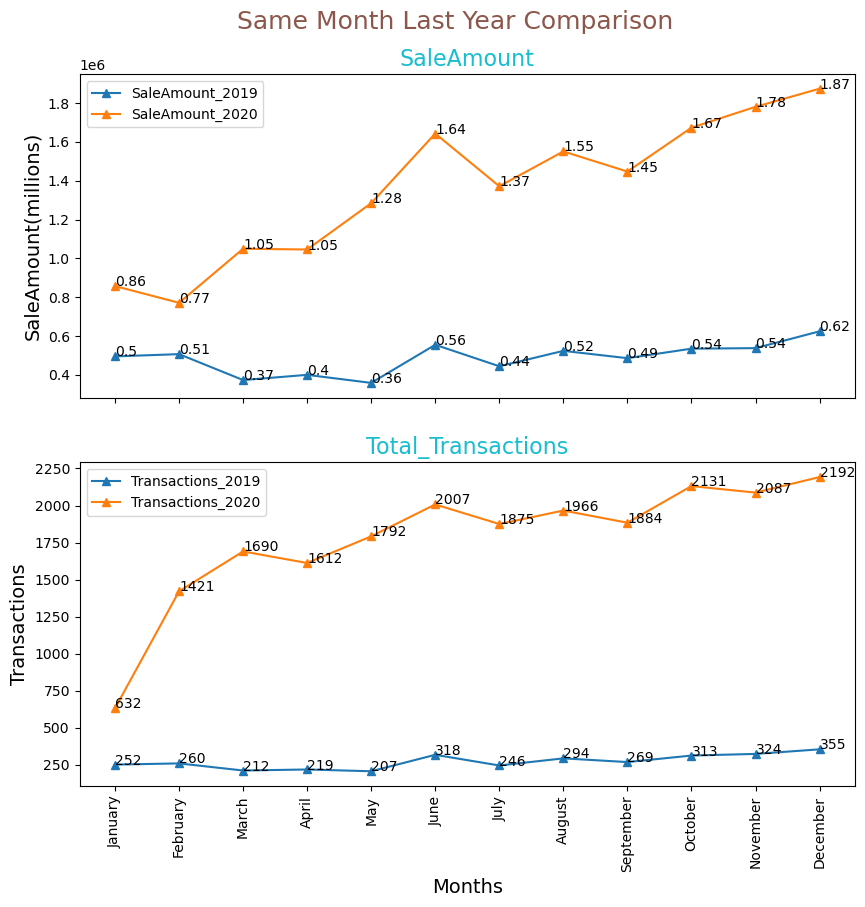

In [70]:
fig,ax = plt.subplots(nrows = 2,figsize = (10,8),sharex = True)

# step  - Creation of same month last year comparison for SaleAmount in subplot 0
ax[0].plot(SameMonthLastYear_SA['Date_2019'].dt.month_name(), SameMonthLastYear_SA['SaleAmount_2019'],marker = '^')
ax[0].plot(SameMonthLastYear_SA['Date_2019'].dt.month_name(), SameMonthLastYear_SA['SaleAmount_2020'],marker = '^')

# step  - Creation of data labels for subplot 0
for x in list(['SaleAmount_2019','SaleAmount_2020']):
    for i,y in enumerate(SameMonthLastYear_SA[x]):
        ax[0].annotate(text = round(y/1000000,2),
                        xy = (i,y),
                       xycoords = 'data',
                       xytext = (0,0),
                       textcoords = 'offset points'
                      )
#step - Formatting the subplot 0 chart elements
ax[0].set_ylabel('SaleAmount(millions)',fontsize = 14)
ax[0].set_title('SaleAmount',fontsize = 16,color = 'tab:cyan')

ax[0].legend(['SaleAmount_2019','SaleAmount_2020'])



# Step - Creation of same month last year comparison for Transactions in subplot 1
ax[1].plot(SameMonthLastYear_T['Date_2019'].dt.month_name(), SameMonthLastYear_T['Transactions_2019'],marker = '^')
ax[1].plot(SameMonthLastYear_T['Date_2019'].dt.month_name(), SameMonthLastYear_T['Transactions_2020'],marker = '^')

# step  - Creation of data labels for subplot 1
for x in list(['Transactions_2019','Transactions_2020']):
    for i,y in enumerate(SameMonthLastYear_T[x]):
        ax[1].annotate(text = y,
                       xy = (i,y),
                       xycoords = 'data',
                       xytext = (0,0),
                       textcoords = 'offset points'
                      )
        
#step - Formatting the subplot 1 chart elements
ax[1].set_ylabel('Transactions',fontsize = 14)
ax[1].set_xlabel('Months',fontsize = 14)
ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation = 90)

ax[1].legend(['Transactions_2019','Transactions_2020'])
ax[1].set_title('Total_Transactions',fontsize = 16,color= 'tab:cyan')

#step - Formatting the figure elements
fig.suptitle('Same Month Last Year Comparison',fontsize = 18,color = 'tab:brown')
fig.subplots_adjust(top = 0.9,bottom = 0.01,hspace = 0.2)
plt.show()



# Sales and budget comparison

In [71]:
SalesBudget.head(5)

,Date_Key,Date,Budget
0,20200101,2020-01-01,800000
1,20200201,2020-02-01,800000
2,20200301,2020-03-01,1000000
3,20200401,2020-04-01,1000000
4,20200501,2020-05-01,1100000


## Total budget for 2020

In [72]:
SalesBudget[SalesBudget['Date'].dt.year == 2020]['Budget'].sum()

15300000

In [73]:
## Resampling sales data to month level and aggregation of data
sales_temp = sales_date_tbl.resample(
                                        on = 'Date',
                                        rule = 'M'
                                    ).agg(
                                            SaleAmount = ('SalesAmount',pd.Series.sum)
                                         ).round(
                                                    decimals=2
                                                ).reset_index()

# step - conversion of date into year-month format
sales_temp['Date'] = sales_temp['Date'].dt.strftime('%Y-%B')

sales_temp

,Date,SaleAmount
0,2019-January,495364.13
1,2019-February,506994.19
2,2019-March,373483.01
3,2019-April,400335.61
4,2019-May,358877.89
5,2019-June,555160.14
6,2019-July,444558.23
7,2019-August,523917.38
8,2019-September,486177.45
9,2019-October,535159.48


In [74]:
# creation of copy of budget data 
budget_temp = SalesBudget.copy()

# step - Conversion of budget date into required format (Year-Month)
budget_temp['Date'] = budget_temp['Date'].dt.strftime('%Y-%B')

budget_temp

,Date_Key,Date,Budget
0,20200101,2020-January,800000
1,20200201,2020-February,800000
2,20200301,2020-March,1000000
3,20200401,2020-April,1000000
4,20200501,2020-May,1100000
5,20200601,2020-June,1100000
6,20200701,2020-July,1500000
7,20200801,2020-August,1500000
8,20200901,2020-September,1500000
9,20201001,2020-October,1500000


## SaleAmount & Budget Comparison

In [75]:
# step - Joining of sales and budget data on date columns
sales_budget_comp = sales_temp.merge(
                                        budget_temp,
                                        how = 'left',
                                        left_on=sales_temp['Date'],
                                        right_on=budget_temp['Date'],
                                        suffixes=('_sales','_budget')
                                    )[['Date_sales','SaleAmount','Date_budget','Budget']]
sales_budget_comp

,Date_sales,SaleAmount,Date_budget,Budget
0,2019-January,495364.13,NaN,NaN
1,2019-February,506994.19,NaN,NaN
2,2019-March,373483.01,NaN,NaN
3,2019-April,400335.61,NaN,NaN
4,2019-May,358877.89,NaN,NaN
5,2019-June,555160.14,NaN,NaN
6,2019-July,444558.23,NaN,NaN
7,2019-August,523917.38,NaN,NaN
8,2019-September,486177.45,NaN,NaN
9,2019-October,535159.48,NaN,NaN


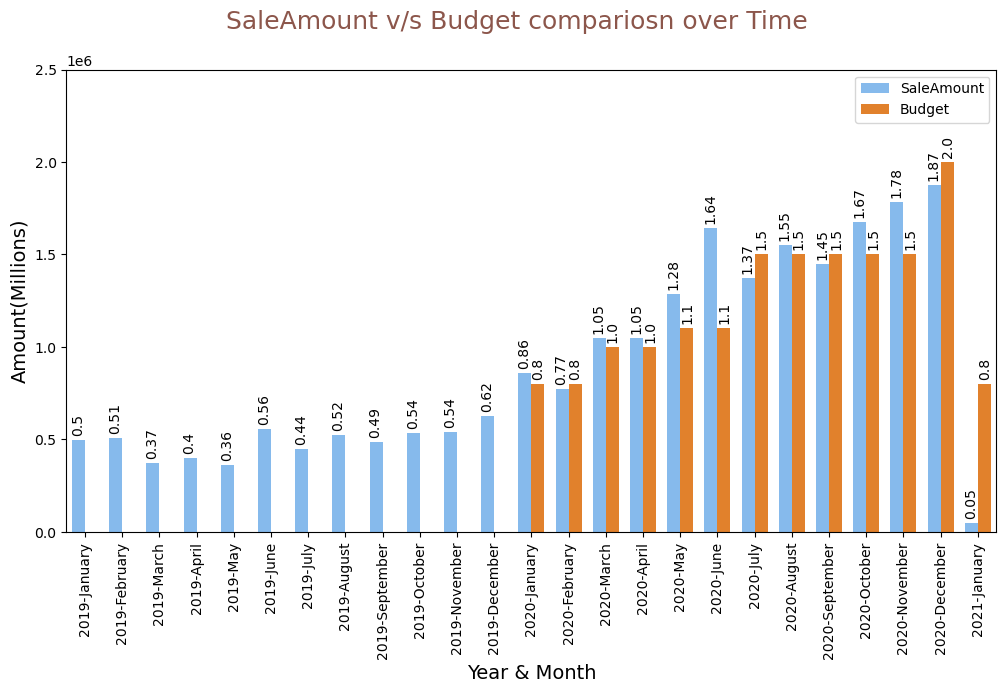

In [76]:
# step - Reshaping the required data (sales_budget_comp)
interim_df = sales_budget_comp.melt(id_vars='Date_sales',value_vars=['SaleAmount','Budget'],var_name='Category',value_name='Amount')

fig,ax = plt.subplots(figsize = (12,6))

# step - Creation of bar plot
sns.barplot(data = interim_df,
           x = interim_df['Date_sales'],
           y = interim_df['Amount'],
           hue = interim_df['Category'],
           width=0.7,
        palette = ('xkcd:sky blue','C1')
            )
# step - Adding data lables
for i,y in enumerate(interim_df['Amount']):
    x_position = i if i<=24 else (i-25)
    alignment = 'right' if i<=24 else 'left'
    ax.annotate(text  = round(y/1000000,2),
                xy = (x_position,y),
                xycoords='data',
                textcoords='data',
                xytext = (x_position,y+40000),
                ha = alignment,
                rotation = 90
                )
# step - formatting chart elements 
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set_xlabel('Year & Month',fontsize = 14)

ax.set_ylim(bottom = 0,top = 2500000)
ax.set_ylabel('Amount(Millions)',fontsize = 14)

ax.legend(bbox_to_anchor = (1,1))

#step - Formatting the figure elements
fig.suptitle('SaleAmount v/s Budget compariosn over Time', fontsize = 18,color = 'tab:brown')
plt.show()

## SaleAmount & Budget comparison metric

In [77]:
# step - attaching SaleAmount_vs_Budget metric column to the sale & budget comparison table
sales_budget_comp.assign(SaleAmount_vs_Budget = sales_budget_comp['SaleAmount']/sales_budget_comp['Budget'])
# SaleAmount_vs_Budget gives us how much of sale is generated for unit of budget allocated over a month

,Date_sales,SaleAmount,Date_budget,Budget,SaleAmount_vs_Budget
0,2019-January,495364.13,NaN,NaN,NaN
1,2019-February,506994.19,NaN,NaN,NaN
2,2019-March,373483.01,NaN,NaN,NaN
3,2019-April,400335.61,NaN,NaN,NaN
4,2019-May,358877.89,NaN,NaN,NaN
5,2019-June,555160.14,NaN,NaN,NaN
6,2019-July,444558.23,NaN,NaN,NaN
7,2019-August,523917.38,NaN,NaN,NaN
8,2019-September,486177.45,NaN,NaN,NaN
9,2019-October,535159.48,NaN,NaN,NaN


# Customer Analysis

In [78]:
DIM_Customers.head(5)

,CustomerKey,First Name,Last Name,Full Name,Gender,DateFirstPurchase,Customer City
0,11000,Jon,Yang,Jon Yang,Male,2018-01-19,Rockhampton
1,11001,Eugene,Huang,Eugene Huang,Male,2018-01-15,Seaford
2,11002,Ruben,Torres,Ruben Torres,Male,2018-01-07,Hobart
3,11003,Christy,Zhu,Christy Zhu,Female,2017-12-29,North Ryde
4,11004,Elizabeth,Johnson,Elizabeth Johnson,Female,2018-01-23,Wollongong


## Total customers on market place

In [79]:
DIM_Customers['CustomerKey'].nunique()

18484

## Customer distribution interms of gender

In [80]:
# step - grouping of data over gender with count as aggregation 
interim_df = DIM_Customers.groupby(
                                    by = 'Gender'
                                  ).agg(
                                        Cust_count = ('CustomerKey',pd.Series.nunique)
                                        ).reset_index()


# step - Calculation of percentage distrubution
interim_df.assign(
                    Percentage_Distribution = interim_df['Cust_count'].apply(
                                                                            lambda x: (x*100)/interim_df['Cust_count'].sum()
                                                                            )
                 )

,Gender,Cust_count,Percentage_Distribution
0,Female,9133,49.410301
1,Male,9351,50.589699


## Total cities available in data

In [81]:
DIM_Customers['Customer City'].nunique()

269

## Customer Presence across cities

In [82]:
# step - grouping data over city with count as aggregation  
cust_city_dist = DIM_Customers.groupby(
                                        by ='Customer City'
                                      ).agg(
                                            Cust_Count = ('CustomerKey',pd.Series.count)
                                           ).sort_values(
                                                            by ='Cust_Count', ascending = False
                                                        ).reset_index()

# step - Attaching of percentage distribution column
cust_city_dist.assign(
                        Percent_Contribution = cust_city_dist['Cust_Count'].apply(lambda x: (x*100)/(cust_city_dist['Cust_Count'].sum()))
                     )

,Customer City,Cust_Count,Percent_Contribution
0,London,420,2.272235
1,Paris,386,2.088293
2,Burien,212,1.146938
3,Concord,212,1.146938
4,Beaverton,210,1.136118
...,...,...,...
264,Branch,1,0.005410
265,Braintree,1,0.005410
266,Cerritos,1,0.005410
267,Clay,1,0.005410


## top 10 cities basing on customer presence

In [83]:
DIM_Customers.groupby(by ='Customer City').agg(Cust_Count = ('CustomerKey',pd.Series.count)).sort_values(by ='Cust_Count', ascending = False).reset_index().head(10)

,Customer City,Cust_Count
0,London,420
1,Paris,386
2,Burien,212
3,Concord,212
4,Beaverton,210
5,Bellingham,210
6,Chula Vista,206
7,Berkeley,200
8,Burlingame,198
9,Bellflower,194


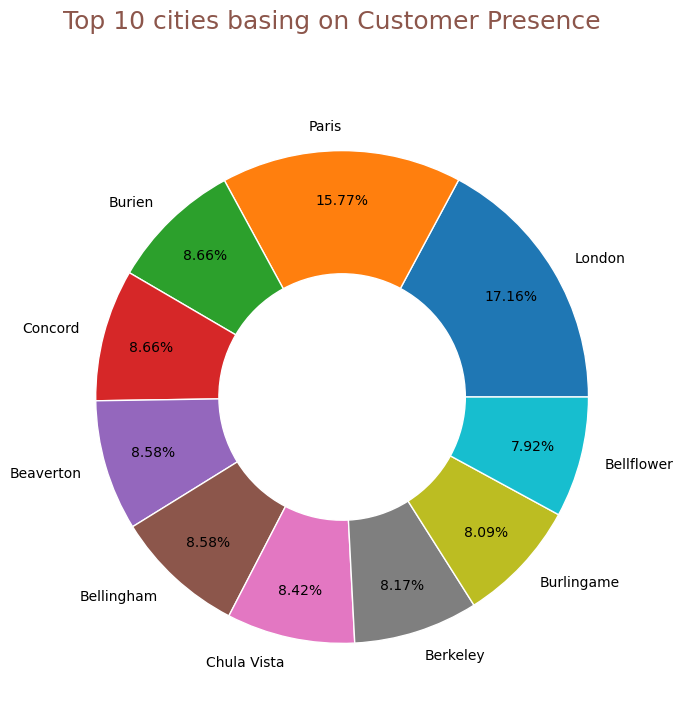

In [84]:
# step - picking the required data 
interim_df = DIM_Customers.groupby(by ='Customer City').agg(Cust_Count = ('CustomerKey',pd.Series.count)).sort_values(by ='Cust_Count', ascending = False).reset_index().head(10)

fig,ax = plt.subplots(figsize = (8,8))
# step - Creation of pie chart
ax.pie(
        x = interim_df['Cust_Count'],
        labels = interim_df['Customer City'],
        autopct='%1.2f%%',
        pctdistance=0.8,
        wedgeprops = {'linewidth': 3,'edgecolor':'white','linewidth' :1,'width' : 0.5}
        )

fig.suptitle('Top 10 cities basing on Customer Presence', fontsize = 18,color = 'tab:brown')

plt.show()

## Segmentation of cities basing on number of customers presence in the city 

In [85]:
#step - assigned a new column in the cust_city_dist containing segement info developed basing on the number of customers available in the city
city_segmentation = cust_city_dist.assign(
                                            Segments = cust_city_dist['Cust_Count'].apply(
                                                                                            lambda x: 'Customer Count Above 300' if x >=300 else 'Cutomer Count Between 200 and 300' if x >= 200 else 'Customers Between 150 and 200' if x>=150 else 'Customers Between 100 and 150' if x>=100 else 'Customers Between 50 and 100' if x>=50 else 'Customer Count Below 50'
                                                                                         ) 
                                         )

# step - grouped the segment data with count aggregation on customer city ans sum aggregation on customer_count
city_segmentation.groupby(by = 'Segments').agg(
                                                City_Count = ('Customer City',pd.Series.count),
                                                Total_Customers = ('Cust_Count',pd.Series.sum)
                                                ).sort_values(by = 'City_Count',ascending = False)

# o/p indicates the no of cites in each segment

,City_Count,Total_Customers
Segments,,
Customers Between 50 and 100,124,9580
Customer Count Below 50,93,1526
Customers Between 100 and 150,36,3825
Customers Between 150 and 200,8,1497
Cutomer Count Between 200 and 300,6,1250
Customer Count Above 300,2,806


# Product Analysis

## Total Product_Categories, Sub_Categories and Products

In [86]:
interim_df = pd.DataFrame(DIM_Products[['Product Category','Sub Category','ProductKey']].nunique(),columns=['count']).reset_index()
interim_df

,index,count
0,Product Category,4
1,Sub Category,37
2,ProductKey,606


## Product and sub_category count distribution across Product Category

In [87]:
interim_df = DIM_Products[
                            ['Product Category','Sub Category','ProductKey']
                        ].groupby(
                                    'Product Category'
                                 ).agg(
                                        sub_category_count = ('Sub Category',pd.Series.nunique),
                                        product_count = ('ProductKey',pd.Series.nunique)
                                      ).reset_index()
interim_df

,Product Category,sub_category_count,product_count
0,Accessories,12,35
1,Bikes,3,125
2,Clothing,8,48
3,Components,14,189


## Product count distribution across Categories and Sub Categories

In [88]:
interim_df = DIM_Products[
                            ['Product Category','Sub Category','ProductKey']
                        ].groupby(
                                    ['Product Category','Sub Category']
                                 ).agg(
                                        product_count = ('ProductKey',pd.Series.nunique)
                                      )
interim_df

product_count
Product Category Sub Category                    
Accessories      Bike Racks                     1
                 Bike Stands                    1
                 Bottles and Cages              3
                 Cleaners                       1
                 Fenders                        1
                 Helmets                        9
                 Hydration Packs                1
                 Lights                         3
                 Locks                          1
                 Panniers                       1
                 Pumps                          2
                 Tires and Tubes               11
Bikes            Mountain Bikes                38
                 Road Bikes                    65
                 Touring Bikes                 22
Clothing         Bib-Shorts                     3
                 Caps                           3
                 Gloves                         9
                 Jerseys                       16
                 Shorts                         7
                 Socks                          4
                 Tights                         3
                 Vests                          3
Components       Bottom Brackets                3
                 Brakes                         2
                 Chains                         1
                 Cranksets                      3
                 Derailleurs                    2
                 Forks                          3
                 Handlebars                    14
                 Headsets                       3
                 Mountain Frames               40
                 Pedals                         7
                 Road Frames                   70
                 Saddles                        9
                 Touring Frames                18
                 Wheels                        14

# Sales_Customer Analysis Combined

## Joining of existing sales_date_table with customer table basing on customer key

In [89]:
# step - Joining of existing sales_date_table with customer table basing on customer key
sls_dt_cust = sales_date_tbl.merge(
                                    DIM_Customers,
                                    how = 'left',
                                    left_on=sales_date_tbl['CustomerKey'],
                                    right_on=DIM_Customers['CustomerKey'],
                                    suffixes=('_sales','_customer')
                                    )[['OrderDateKey','Date','SalesOrderNumber','SalesAmount','ProductKey','CustomerKey_sales','Full Name','Gender','Customer City']]
sls_dt_cust.head(5)

,OrderDateKey,Date,SalesOrderNumber,SalesAmount,ProductKey,CustomerKey_sales,Full Name,Gender,Customer City
0,20190101,2019-01-01,SO46700,1000.4375,381,16942,Kaitlyn Bennett,Female,Bobigny
1,20190101,2019-01-01,SO46701,2181.5625,375,15114,Erika Munoz,Female,Stuttgart
2,20190101,2019-01-01,SO46702,2443.3500,369,15116,Mackenzie Ramirez,Female,Kassel
3,20190101,2019-01-01,SO46703,782.9900,337,20576,Johnathan Kapoor,Male,London
4,20190101,2019-01-01,SO46704,2443.3500,370,13059,Keith Deng,Male,Colma


## top 10 customers interms of SaleAmount

In [90]:
sls_dt_cust.groupby(
                    by = ['CustomerKey_sales','Full Name']
                    ).agg(
                            SaleAmount = ('SalesAmount',pd.Series.sum),
                            Total_Transactions = ('SalesOrderNumber',pd.Series.nunique)
                         ).sort_values(
                                        by ='SaleAmount',
                                        ascending=False
                                      ).head(10)

,,SaleAmount,Total_Transactions
CustomerKey_sales,Full Name,,
11433,Maurice Shan,12909.6682,6
11439,Janet Munoz,12489.1696,6
11241,Lisa Cai,11469.1882,7
11417,Lacey Zheng,11248.4582,7
11420,Jordan Turner,11200.7696,7
11242,Larry Munoz,11068.0082,7
11425,Ariana Gray,10528.6282,6
11429,Marco Lopez,10468.3796,6
14186,Katrina Tang,9796.3200,4


## top 10 customers interms of Total_Transactions 

In [91]:
sls_dt_cust.groupby(
                    by = ['CustomerKey_sales','Full Name']
                    ).agg(
                            Total_Transactions = ('SalesOrderNumber',pd.Series.nunique),
                            SaleAmount = ('SalesAmount',pd.Series.sum)
                            
                         ).sort_values(
                                        by ='Total_Transactions',
                                        ascending=False
                                      ).head(10)

# Customers with top sale amount have made very less transactions when compared to the customer with highest number of transactions. 
# Hence we can conclude that Total_Transactions made by customer is not impacting Total_SaleAmount
 

,,Total_Transactions,SaleAmount
CustomerKey_sales,Full Name,,
11176,Mason Roberts,28,1320.01
11091,Dalton Perez,28,1189.33
11330,Ryan Thompson,27,1136.35
11200,Jason Griffin,27,1463.38
11287,Henry Garcia,27,1167.07
11711,Daniel Davis,27,1103.78
11331,Samantha Jenkins,27,1329.31
11223,Hailey Patterson,27,1205.38
11276,Nancy Chapman,27,988.32


## identification of inative customers 

In [92]:
# step - Extracted customerkeys of all the customers who made purhase atleast once
active_customers = pd.DataFrame(sls_dt_cust.groupby(by = ['CustomerKey_sales','Full Name']).agg(SaleAmount = ('SalesAmount',pd.Series.sum)).reset_index()['CustomerKey_sales'].sort_values(ascending = True ))

# step - Customer keys of all customers
all_customers = pd.DataFrame(DIM_Customers['CustomerKey'].sort_values(ascending=True))

# step - joined all and active customer basing on the customer keys in both tables.
inactive_customers = all_customers.merge(
                                            active_customers,
                                            how = 'outer',
                                            left_on=all_customers['CustomerKey'],
                                            right_on=active_customers['CustomerKey_sales'],
                                            suffixes=('_all','_active')
                                        )

# step - filtered the data using customer keys of active customers
inactive_customers[inactive_customers['CustomerKey_sales'].isnull()]['CustomerKey'].reset_index(drop = True)



0      19802
1      20075
2      22971
3      22975
4      23566
       ...  
257    29467
258    29474
259    29475
260    29476
261    29481
Name: CustomerKey, Length: 262, dtype: int64

## gender wise SaleAmount and Total_Transactions

In [93]:
sls_dt_cust.groupby(by = 'Gender').agg(
                                        SaleAmount = ('SalesAmount',pd.Series.sum),
                                        Total_Transactions = ('SalesOrderNumber',pd.Series.nunique)
                                      ).round(decimals= 2)

,SaleAmount,Total_Transactions
Gender,,
Female,11229599.04,12626
Male,11010131.21,12803


## Total Cities with active market presence

In [94]:
sls_dt_cust['Customer City'].nunique()

268

## Top 10 cities with highest SaleAmount

In [95]:
interim_df = sls_dt_cust.groupby(
                                    by = 'Customer City'
                                ).agg(
                                        SaleAmount = ('SalesAmount',pd.Series.sum)
                                     ).sort_values(
                                                    by = 'SaleAmount',ascending=False
                                                  ).reset_index()


interim_df.assign(percentage_distribution = interim_df['SaleAmount'].apply(lambda x: (x*100)/interim_df['SaleAmount'].sum()) ).round(decimals = 2).head(10)

,Customer City,SaleAmount,percentage_distribution
0,London,693517.95,3.12
1,Paris,470333.99,2.11
2,Wollongong,256013.91,1.15
3,Bendigo,233819.75,1.05
4,Berlin,230563.73,1.04
5,Warrnambool,224971.06,1.01
6,Bellflower,220219.41,0.99
7,Townsville,217410.52,0.98
8,Sydney,215964.37,0.97
9,Goulburn,212457.62,0.96


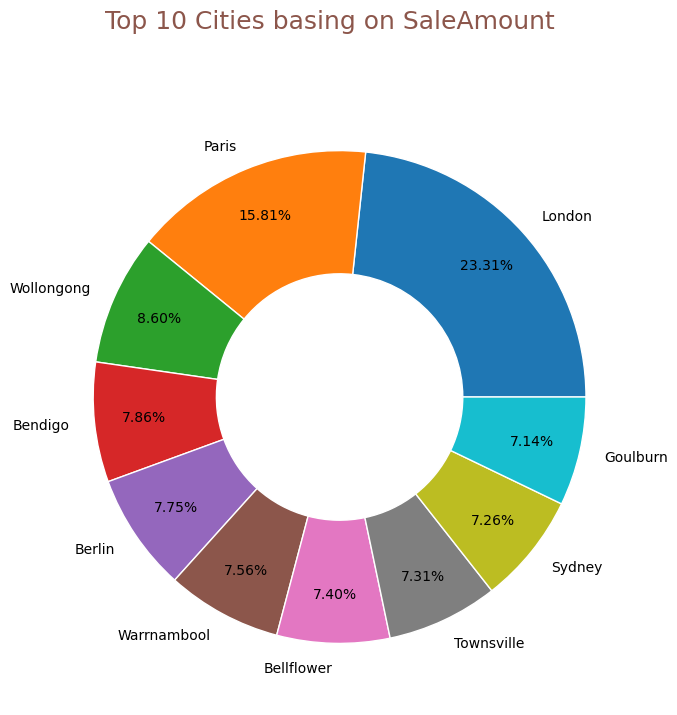

In [96]:
# step - Extraction of required data 
interim_df = interim_df.head(10)

fig,ax = plt.subplots(figsize = (8,8))
# step - Creation of pie chart
ax.pie(
        x = interim_df['SaleAmount'],
        labels = interim_df['Customer City'],
        autopct='%1.2f%%',
        pctdistance=0.8,
        wedgeprops = {'linewidth': 8,'edgecolor':'white','linewidth' :1,'width' : 0.5}
        )

# step - formatting the figure elements
fig.suptitle('Top 10 Cities basing on SaleAmount', fontsize = 18,color = 'tab:brown')


plt.show()

# comment - the percentages are different when compared to data in table as in pie chart percentages are calculated basing on only top 10

## Yearly new customer addition

In [97]:
# step - extraction of required columns
interim_df = sls_dt_cust[['CustomerKey_sales','Date']]

# step - extraction of year from date column
interim_df['Date'] = interim_df['Date'].dt.year

# step - grouping data basing on customer key and minimum aggregation of year data to get the first purchase year
interim_df = interim_df.groupby('CustomerKey_sales').agg(first_purchase_year = ('Date',pd.Series.min)).reset_index()

# step - grouping the first_purchase_year data with count based aggregation on customer key 
interim_df.groupby(by = 'first_purchase_year').agg(new_customer_count = ('CustomerKey_sales',pd.Series.count))

# O/P Indicates that we have 14461 new customers added in the year 2020 (We cannot comment on the data of 2020 as we dont have previous date)
# For year 2021 till the date considered there were 506 new customers added on to platform.

C:\Users\sekha\AppData\Local\Temp\ipykernel_32032\2727911802.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interim_df['Date'] = interim_df['Date'].dt.year


,new_customer_count
first_purchase_year,
2019,3255
2020,14461
2021,506


## Yearly customer churn

In [98]:
# step - extraction of required columns
interim_df = sls_dt_cust[['CustomerKey_sales','Date']]

# step - extraction of year from date column
interim_df['Date'] = interim_df['Date'].dt.year

# step - grouping data basing on customer key and maximum aggregation of year data to get the last purchase year
interim_df = interim_df.groupby('CustomerKey_sales').agg(last_purchase_year = ('Date',pd.Series.max)).reset_index()

# step - grouping the last_purchase_year data with count based aggregation on customer key 
interim_df.groupby(by = 'last_purchase_year').agg(new_customer_count = ('CustomerKey_sales',pd.Series.count))

# --O/P The platform has lost 287 customers from 2019 to 2020. Could not comment on 2020-2021 as the data is not available


C:\Users\sekha\AppData\Local\Temp\ipykernel_32032\37159728.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interim_df['Date'] = interim_df['Date'].dt.year


,new_customer_count
last_purchase_year,
2019,287
2020,17101
2021,834


# Sales Product analysis Combined

## Joining of existing sales_date_customer table with product table

In [99]:
# Joining of existing sales_date_customer table with product table basing on product key

sls_dt_cust_prod = sls_dt_cust.merge(
                                        DIM_Products,
                                        how='left',
                                        left_on=sls_dt_cust['ProductKey'],
                                        right_on=DIM_Products['ProductKey'],
                                        suffixes=('_sales','_product')
                                     )[['OrderDateKey','Date','SalesOrderNumber','SalesAmount','CustomerKey_sales','Full Name','Gender','Customer City','ProductKey_sales','Product Name','Product Category','Sub Category','Product Status']]
sls_dt_cust_prod.head(5)

,OrderDateKey,Date,SalesOrderNumber,SalesAmount,CustomerKey_sales,Full Name,Gender,Customer City,ProductKey_sales,Product Name,Product Category,Sub Category,Product Status
0,20190101,2019-01-01,SO46700,1000.4375,16942,Kaitlyn Bennett,Female,Bobigny,381,"Road-550-W Yellow, 38",Bikes,Road Bikes,Outdate
1,20190101,2019-01-01,SO46701,2181.5625,15114,Erika Munoz,Female,Stuttgart,375,"Road-250 Black, 48",Bikes,Road Bikes,Outdate
2,20190101,2019-01-01,SO46702,2443.3500,15116,Mackenzie Ramirez,Female,Kassel,369,"Road-250 Red, 48",Bikes,Road Bikes,Outdate
3,20190101,2019-01-01,SO46703,782.9900,20576,Johnathan Kapoor,Male,London,337,"Road-650 Black, 62",Bikes,Road Bikes,Outdate
4,20190101,2019-01-01,SO46704,2443.3500,13059,Keith Deng,Male,Colma,370,"Road-250 Red, 52",Bikes,Road Bikes,Outdate


## Category wise SaleAmount and UnitsSold distribution

In [100]:
# step - Grouping the data on product category with sum aggregation on saleamount and count on sale order number 
interim_df = sls_dt_cust_prod.groupby(by = 'Product Category').agg(
                                                        SaleAmount = ('SalesAmount',pd.Series.sum),
                                                        UnitsSold = ('SalesOrderNumber',pd.Series.count)
                                                        ).round(decimals=2).reset_index(drop = False)


#step -  inserting of percentage SaleAmount column at column index 2
interim_df.insert(
                    2, 'percent_SaleAmount', interim_df['SaleAmount'].apply(lambda x: (x*100)/interim_df['SaleAmount'].sum())
                )

#step -  inserting of percentage units sold column at column index 4
interim_df.insert(4, 'percent_UnitsSold', interim_df['UnitsSold'].apply(lambda x: (x*100)/interim_df['UnitsSold'].sum()))

# step - creation of new column SaleAmount_vs_UnitsSold
interim_df.assign(SaleAmount_vs_UnitsSold = interim_df['SaleAmount']/interim_df['UnitsSold'])

# With 22% of total units sold, Product Category BIKES is contributing 95% of total Sale amount even
# The Percentage values are indicating that there is not direct relation b/w units sold and sale amount
# The metric SaleAmount_vs_UnitsSold indicated how much sale we are generating for every unit of respective Product_Category sold


,Product Category,SaleAmount,percent_SaleAmount,UnitsSold,percent_UnitsSold,SaleAmount_vs_UnitsSold
0,Accessories,700759.96,3.150937,36092,62.047861,19.415936
1,Bikes,21199197.69,95.321290,12975,22.306079,1633.849533
2,Clothing,339772.61,1.527773,9101,15.646060,37.333547


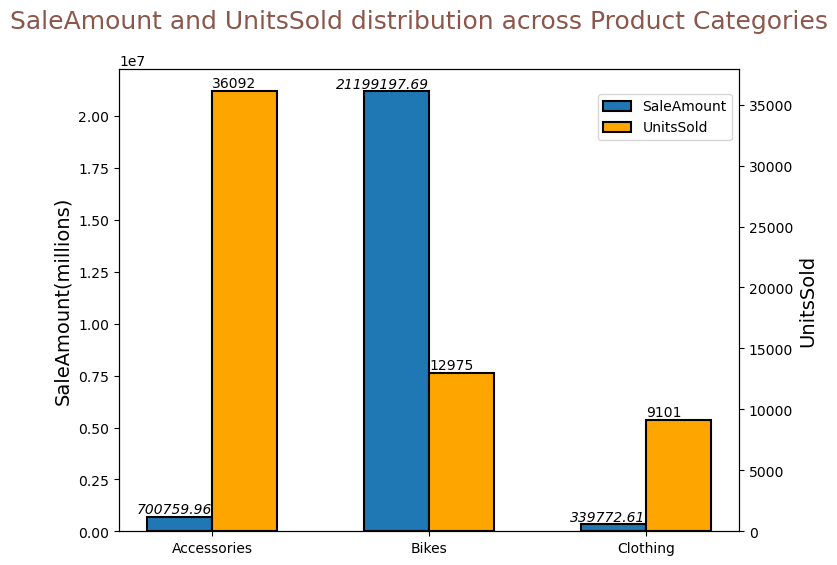

In [101]:
fig,ax = plt.subplots(figsize= (8,6))

# step - creation of barchart for Saleamount over time 
ax.bar(
       x = interim_df['Product Category'],
       height = interim_df['SaleAmount'],
       width = -0.3,
        align = 'edge',
         edgecolor = 'black',
        linewidth = 1.5
        )
        
# step - creation of secondary axis
ax2 = ax.twinx()

# step - creation of bar plot on secondary axis
ax2.bar(
       x = interim_df['Product Category'],
       height = interim_df['UnitsSold'],
       width = 0.3,
        align = 'edge',
        color = 'orange',
         edgecolor = 'black',
        linewidth = 1.5
        )
# step - Adding Data Lables
for i , y in enumerate(interim_df['SaleAmount']):
    ax.annotate(xy = (i,y),xycoords='data',text = y,xytext = (i,y+10000),textcoords = 'data',ha = 'right',va = 'bottom',fontstyle = 'italic')

for i , y in enumerate(interim_df['UnitsSold']):
    ax2.annotate(xy = (i,y),xycoords='data',text = y,xytext = (i,y+100),textcoords = 'data',ha = 'left',va = 'bottom')


#step - Formatting the chart elements
ax.set_ylabel('SaleAmount(millions)',fontsize = 14)
ax2.set_ylabel('UnitsSold',fontsize = 14)



#step - Formatting the figure elements
fig.legend(['SaleAmount','UnitsSold'],bbox_to_anchor = (0.9,0.85))
fig.suptitle('SaleAmount and UnitsSold distribution across Product Categories',fontsize = 18, color = 'tab:brown')

plt.show()

## Top 3 Sub_Categories in each category

In [102]:
# Step - Creating a df by grouping the category and sub_category and aggregation on saleamount and reset the index at the end. 
interim_df = sls_dt_cust_prod.groupby(
                                        ['Product Category','Sub Category']
                                     ).agg(
                                            SaleAmount = ('SalesAmount',pd.Series.sum)
                                          ).round(decimals=2).reset_index()


# step- making new column by grouping the data again on product category and applying the rank function  
interim_df['rank'] = interim_df[
                                    ['Product Category','SaleAmount']
                               ].groupby(
                                            by = 'Product Category'
                                        ).rank(
                                                ascending = False,method = 'min'
                                              )
# step - Filtering sub_categories with top 3 ranks
interim_df= interim_df[interim_df['rank'].isin([1,2,3])].sort_values(by = ['Product Category','rank'],ascending = True)
interim_df

,Product Category,Sub Category,SaleAmount,rank
7,Accessories,Tires and Tubes,245529.32,1.0
5,Accessories,Helmets,225335.60,2.0
2,Accessories,Bottles and Cages,56798.19,3.0
9,Bikes,Road Bikes,8750976.82,1.0
8,Bikes,Mountain Bikes,8603419.81,2.0
10,Bikes,Touring Bikes,3844801.05,3.0
13,Clothing,Jerseys,172950.68,1.0
14,Clothing,Shorts,71319.81,2.0
16,Clothing,Vests,35687.00,3.0


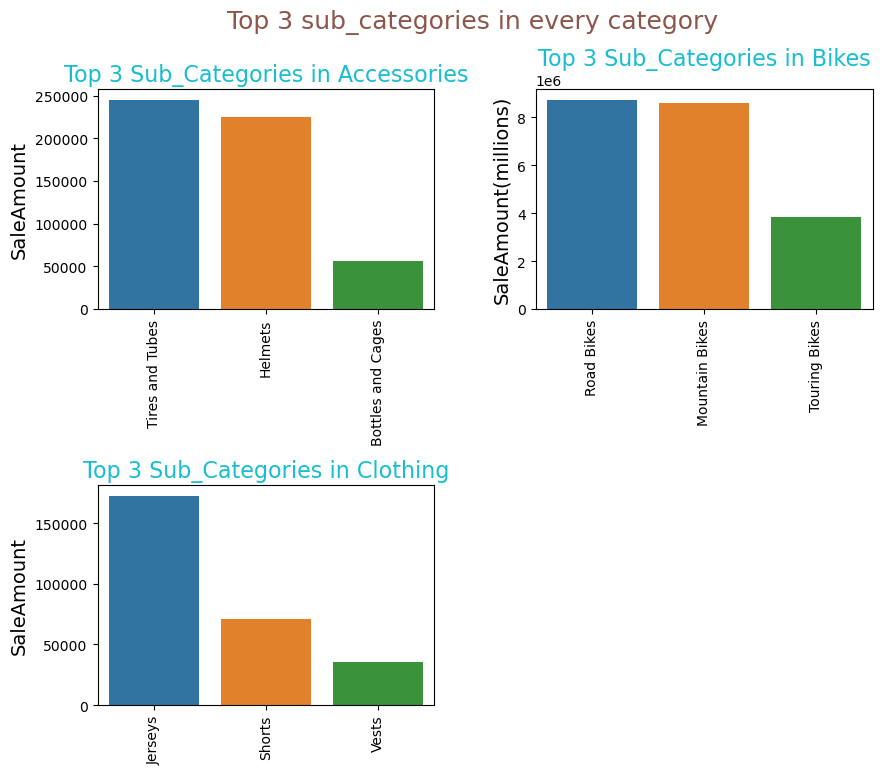

In [103]:
fig,ax = plt.subplots(nrows = 2,ncols = 2,figsize = (10,8))


# step - creation of plots in subplots through looping
for i,prod_cat in enumerate(interim_df['Product Category'].unique()):
    temp_df = interim_df[interim_df['Product Category'] == prod_cat]
    row = i//2
    col = i%2
    sns.barplot(data = temp_df,
                x = temp_df['Sub Category'],
                y = temp_df['SaleAmount'],
                ax = ax[row][col])

# step - formatting the subplot elements in loop
    ax[row][col].set_xticklabels(ax[row][col].get_xticklabels(),rotation = 90)
    ax[row][col].set_title('Top 3 Sub_Categories in ' + prod_cat,fontsize = 16,color= 'tab:cyan')
    ax[row][col].set_xlabel('')
    ax[row][col].set_ylabel('SaleAmount',fontsize = 14)
    
# step - reformitting specific subplot elements
ax[0][1].set_ylabel('SaleAmount(millions)')
ax[1][1].set_axis_off()

# step - Formmating the chart elements  
fig.suptitle('Top 3 sub_categories in every category', fontsize = 18,color = 'tab:brown')
fig.subplots_adjust(wspace= 0.3,hspace = 0.8)


## top 5 Products in each category

In [104]:
# Step - Creating a df by grouping the category and product_name and aggregation on saleamount and reset the index at the end. 
interim_df = sls_dt_cust_prod.groupby(
                                        ['Product Category','Product Name']
                                     ).agg(
                                            SaleAmount = ('SalesAmount',pd.Series.sum)
                                          ).round(decimals=2).reset_index()


# step- making new column by grouping the subset data again on product category and applying the rank function  
interim_df['rank'] = interim_df[
                                    ['Product Category','SaleAmount']
                               ].groupby(
                                            by = 'Product Category'
                                        ).rank(
                                                ascending = False,method = 'min'
                                              )

# step - Filtering products with top 5 ranks
interim_df = interim_df[interim_df['rank'].isin([1,2,3,4,5])].sort_values(by = ['Product Category','rank'],ascending = True)
interim_df

,Product Category,Product Name,SaleAmount,rank
18,Accessories,"Sport-100 Helmet, Red",78027.70,1.0
17,Accessories,"Sport-100 Helmet, Blue",74353.75,2.0
16,Accessories,"Sport-100 Helmet, Black",72954.15,3.0
3,Accessories,HL Mountain Tire,48860.00,4.0
2,Accessories,Fender Set - Mountain,46619.58,5.0
24,Bikes,"Mountain-200 Black, 46",1371420.45,1.0
23,Bikes,"Mountain-200 Black, 42",1363142.09,2.0
25,Bikes,"Mountain-200 Silver, 38",1339462.79,3.0
27,Bikes,"Mountain-200 Silver, 46",1301100.10,4.0
22,Bikes,"Mountain-200 Black, 38",1290767.94,5.0


## Identification of Products not purchased atleast once

In [105]:
# step - products being purchased 
active_products = pd.Series(sls_dt_cust_prod['ProductKey_sales'].unique(),name = 'keys')

# step - products available on market place
total_products = pd.Series(DIM_Products['ProductKey'].unique(),name = 'keys')

# step - filtering out the active products from total products to get unpurchased products 
unpurchased_products = pd.DataFrame(
                                    total_products[
                                                ~(total_products.isin(active_products)) # filter condition
                                                ]
                                    ).rename(
                                                columns = {'keys':'unpurchased_prod_keys'}
                                            )
unpurchased_products

,unpurchased_prod_keys
0,1
1,2
2,3
3,4
4,5
...,...
557,558
558,559
600,601
601,602


## Unpurchased products distribution wrt to product status

In [106]:
unpurchased_products.merge(
                            DIM_Products,
                            how = 'left',
                            left_on=unpurchased_products['unpurchased_prod_keys'],
                            right_on=DIM_Products['ProductKey'],
                            suffixes=('_unpurchased','_prod')
                            )[
                                ['unpurchased_prod_keys','Product Status']
                            ].groupby(
                                        by = 'Product Status'
                                     ).agg(
                                            unpurchased_products_count = ('unpurchased_prod_keys',pd.Series.count)
                                          ).reset_index()

# o/p indicating that 304 out of 473 unpurchased products are active 

,Product Status,unpurchased_products_count
0,Current,304
1,Outdate,169


# Sales,Customer and Product Analysis combined

## Male and Female purchase pattern across Products_Categories

In [107]:
# step - Extraction of required data
interim_df = sls_dt_cust_prod[
                                ['Product Category','Gender','SalesAmount']
                             ].groupby(
                                        by = ['Gender','Product Category']
                                      ).agg(
                                            SaleAmount = ('SalesAmount',pd.Series.sum)
                                            ).round(
                                                    decimals = 2
                                                    ).reset_index()

# Step - seperation of male and female saleamount data
interim_df_female = interim_df[interim_df['Gender'] == 'Female']
interim_df_male = interim_df[interim_df['Gender'] == 'Male']

# step - Joining of male and female data on product category and extraction of req columns
interim_df = interim_df_female.merge(
                                        interim_df_male,
                                        how = 'inner',
                                        left_on=interim_df_female['Product Category'],
                                        right_on=interim_df_male['Product Category'],
                                        suffixes=('_female','_male')
                                    )[
                                        ['key_0','SaleAmount_female','SaleAmount_male']
                                     ].rename(columns = {'key_0':'Product Category'})

# step - attaching Ratio_Female_VS_Male column 
interim_df = interim_df.assign(
                                Ratio_Female_VS_Male = interim_df['SaleAmount_female']/interim_df['SaleAmount_male']
                              )

interim_df

# Results indicating that Gender is not a significant factor in selection of products

,Product Category,SaleAmount_female,SaleAmount_male,Ratio_Female_VS_Male
0,Accessories,349566.84,351193.12,0.995369
1,Bikes,10713218.73,10485978.95,1.021671
2,Clothing,166813.47,172959.14,0.964468


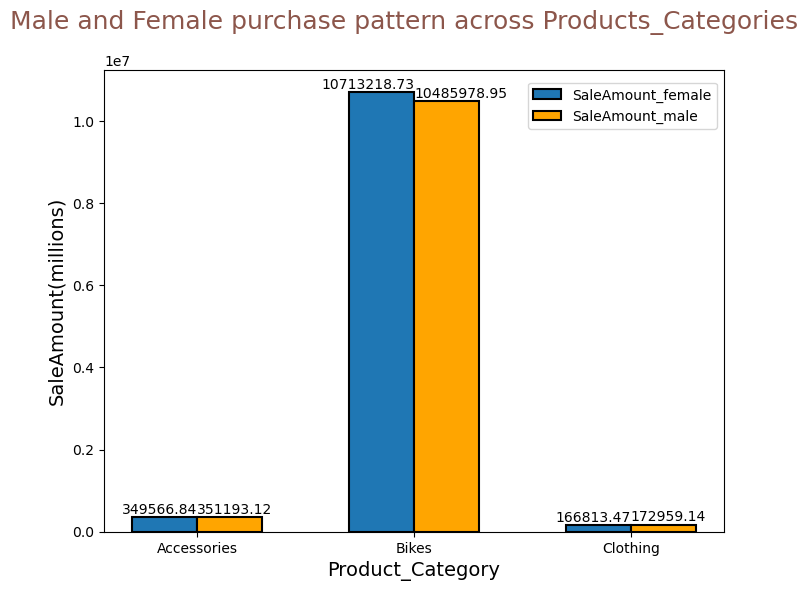

In [108]:
fig,ax = plt.subplots(figsize = (8,6))

# step - creation of bar graph for female data
ax.bar(
       x = interim_df['Product Category'],
       height = interim_df['SaleAmount_female'],
       width = -0.3,
        align = 'edge',
        edgecolor = 'black',
        linewidth = 1.5
        )
# step - creation of bar graph for male data

ax.bar(
       x = interim_df['Product Category'],
       height = interim_df['SaleAmount_male'],
       width = 0.3,
        align = 'edge',
        color = 'orange',
        edgecolor = 'black',
        linewidth = 1.5
        )
        
# step - adding data labels
for pos,col in enumerate(list(['SaleAmount_female','SaleAmount_male'])):
    for i,y in enumerate(interim_df[col]):
        alignment = 'right' if pos == 0 else 'left'
        ax.annotate(
                        xy = (i,y),
                        xycoords = 'data',
                        text = y,
                        xytext = (i,y+10000),
                        textcoords = 'data',
                        ha = alignment,
                        va = 'bottom'
         )
        
#step - Formatting the chart elements
ax.set_xlabel('Product_Category',fontsize = 14)
ax.set_ylabel('SaleAmount(millions)',fontsize = 14)

#step - Formatting the figure elements
fig.legend(['SaleAmount_female', 'SaleAmount_male'], bbox_to_anchor = (0.9,0.87))
fig.suptitle('Male and Female purchase pattern across Products_Categories',fontsize = 18, color = 'tab:brown')

plt.show()

## Male and Female purchase pattern across Products_SubCategories

In [109]:
# step - Extraction of required data
interim_df = sls_dt_cust_prod[
                                ['Product Category','Sub Category','Gender','SalesAmount']
                             ].groupby(
                                        by = ['Gender','Sub Category','Product Category']
                                      ).agg(
                                            SaleAmount = ('SalesAmount',pd.Series.sum)
                                            ).round(
                                                    decimals = 2
                                                    ).reset_index()

# Step - seperation of male and female saleamount data
interim_df_female = interim_df[interim_df['Gender'] == 'Female']
interim_df_male = interim_df[interim_df['Gender'] == 'Male']

# step - Joining of male and female data on product category and extraction of req columns
interim_df = interim_df_female.merge(
                                        interim_df_male,
                                        how = 'inner',
                                        left_on=interim_df_female['Sub Category'],
                                        right_on=interim_df_male['Sub Category'],
                                        suffixes=('_female','_male')
                                    )[
                                        ['Product Category_female','key_0','SaleAmount_female','SaleAmount_male']
                                     ].rename(columns = {'Product Category_female':'Product Category','key_0':'Product_Sub_Category',})

# step attaching Ratio_Female_VS_Male column 
interim_df = interim_df.assign(
                                Ratio_Female_VS_Male = interim_df['SaleAmount_female']/interim_df['SaleAmount_male']
                              ).sort_values(by = ['Product Category','Product_Sub_Category'])

interim_df

# Results indicating that Gender is not a significant factor in selection of products SubCategories


,Product Category,Product_Sub_Category,SaleAmount_female,SaleAmount_male,Ratio_Female_VS_Male
0,Accessories,Bike Racks,18480.00,20880.00,0.885057
1,Accessories,Bike Stands,22260.00,17331.00,1.284404
2,Accessories,Bottles and Cages,28119.53,28678.66,0.980504
4,Accessories,Cleaners,3482.10,3736.50,0.931915
5,Accessories,Fenders,22947.12,23672.46,0.969359
7,Accessories,Helmets,113122.67,112212.93,1.008107
8,Accessories,Hydration Packs,20181.33,20126.34,1.002732
14,Accessories,Tires and Tubes,120974.09,124555.23,0.971249
10,Bikes,Mountain Bikes,4383354.11,4220065.70,1.038693
11,Bikes,Road Bikes,4392119.30,4358857.53,1.007631


C:\Users\sekha\AppData\Local\Temp\ipykernel_32032\2007094906.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation = 45,va= 'top',ha = 'right')


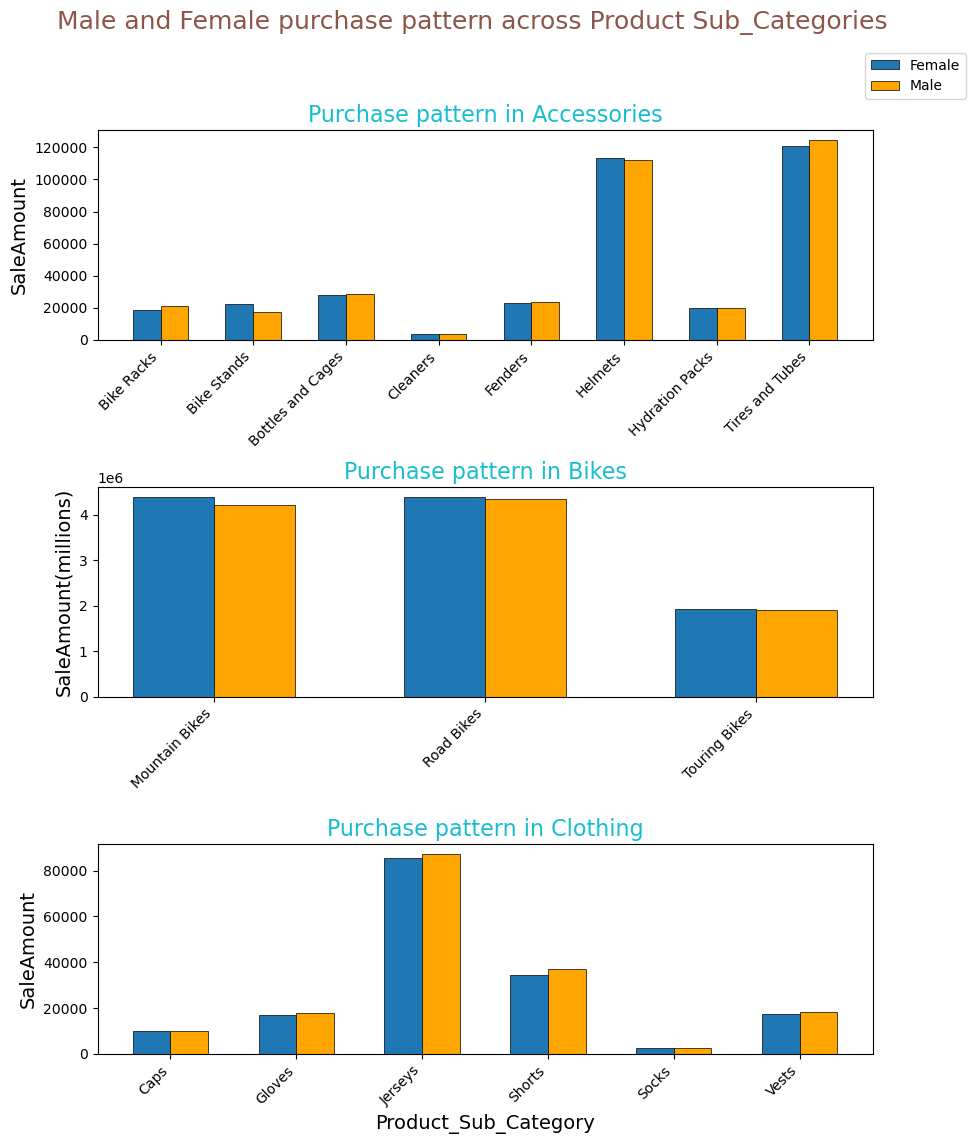

In [110]:
fig,ax = plt.subplots(nrows = 3,figsize = (10,12))

# step - Filtering the req data
for i,prod_cat in enumerate(interim_df['Product Category'].unique()):
    temp_df = interim_df[interim_df['Product Category'] == prod_cat]

# step - Creation of bar for female
    ax[i].bar(
              x = temp_df['Product_Sub_Category'],
              height = temp_df['SaleAmount_female'],
              width = -0.3,
              align = 'edge',
              edgecolor = 'black',
              linewidth = 0.5
             )

# step - creation of bar chart for male
    ax[i].bar(
                x = temp_df['Product_Sub_Category'],
                height = temp_df['SaleAmount_male'],
                width = 0.3,
                align = 'edge',
                color = 'orange',
                edgecolor = 'black',
                linewidth = 0.5
             )

# formatting the subplot elements over loop 
    ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation = 45,va= 'top',ha = 'right')
    ax[i].set_xlabel('')
    ax[i].set_ylabel('SaleAmount',fontsize = 14)
    ax[i].set_title('Purchase pattern in '+ prod_cat,fontsize = 16,color= 'tab:cyan')

# reformatting specific subplot elements 
ax[1].set_ylabel('SaleAmount(millions)',fontsize = 14)
ax[2].set_xlabel('Product_Sub_Category',fontsize = 14)

# formatting of figure elements
fig.legend(['Female','Male'],bbox_to_anchor = (1,0.95))
fig.suptitle('Male and Female purchase pattern across Product Sub_Categories',fontsize = 18, color = 'tab:brown')
fig.subplots_adjust(hspace = 0.7)

## Comparison of top products among gender

In [111]:
# step - Extraction of req data 
interim_df = sls_dt_cust_prod[
                                ['Gender','Product Category','Product Name','SalesAmount']
                             ].groupby(
                                        by = ['Gender','Product Category','Product Name']
                                      ).agg(
                                            SaleAmount = ('SalesAmount',pd.Series.sum)
                                            ).reset_index()

# step - Attaching of rank for sale amount basing on gender and product category
interim_df['rank'] = interim_df[
                                    ['Gender','Product Category','SaleAmount']
                                ].groupby(
                                            by = ['Gender','Product Category']
                                         ).rank(
                                                ascending = False,method = 'min'
                                                )
# step - sorting of data
interim_df = interim_df.sort_values(
                                    by = ['Gender','Product Category','rank'],
                                    ascending = True
                                    )
# step - filter the top products basing on rank
interim_df = interim_df[interim_df['rank'].isin([1,2,3,4,5])]


# step - separating the male and female data
interim_df_female = interim_df[interim_df['Gender'] == 'Female']
interim_df_male = interim_df[interim_df['Gender'] == 'Male']


# joining the male and female data basing on product name with outer join 
product_comparison_data = interim_df_female.merge(
                                                    interim_df_male,
                                                    how = 'outer',
                                                    left_on=interim_df_female['Product Name'],
                                                    right_on=interim_df_male['Product Name'],
                                                    suffixes=('_female','_male')
                                                )[
                                                    ['Product Category_female','Product Name_female','SaleAmount_female','rank_female','Product Category_male','Product Name_male','SaleAmount_male','rank_male',]
                                                 ]
product_comparison_data

,Product Category_female,Product Name_female,SaleAmount_female,rank_female,Product Category_male,Product Name_male,SaleAmount_male,rank_male
0,Accessories,"Sport-100 Helmet, Red",38628.9600,1.0,Accessories,"Sport-100 Helmet, Red",39398.7400,1.0
1,Accessories,"Sport-100 Helmet, Blue",38244.0700,2.0,Accessories,"Sport-100 Helmet, Blue",36109.6800,3.0
2,Accessories,"Sport-100 Helmet, Black",36249.6400,3.0,Accessories,"Sport-100 Helmet, Black",36704.5100,2.0
3,Accessories,HL Mountain Tire,24290.0000,4.0,Accessories,HL Mountain Tire,24570.0000,4.0
4,Accessories,Fender Set - Mountain,22947.1200,5.0,Accessories,Fender Set - Mountain,23672.4600,5.0
5,Bikes,"Mountain-200 Black, 42",713332.0690,1.0,Bikes,"Mountain-200 Black, 42",649810.0244,4.0
6,Bikes,"Mountain-200 Black, 46",712102.6100,2.0,Bikes,"Mountain-200 Black, 46",659317.8400,3.0
7,Bikes,"Mountain-200 Silver, 46",673957.0908,3.0,Bikes,"Mountain-200 Silver, 46",627143.0076,5.0
8,Bikes,"Mountain-200 Silver, 42",668488.5432,4.0,NaN,NaN,NaN,NaN
9,Bikes,"Mountain-200 Silver, 38",666914.2644,5.0,Bikes,"Mountain-200 Silver, 38",672548.5260,2.0


### comparison for Accessories

In [112]:
# step - filtering the accessories category data from final product_comparison_data
product_comparison_data[(product_comparison_data['Product Category_female'] == 'Accessories')|(product_comparison_data['Product Category_male'] == 'Accessories')]

# from the o/p we can confrirm there is almost no difference in choice of accessories b/w male and female

,Product Category_female,Product Name_female,SaleAmount_female,rank_female,Product Category_male,Product Name_male,SaleAmount_male,rank_male
0,Accessories,"Sport-100 Helmet, Red",38628.96,1.0,Accessories,"Sport-100 Helmet, Red",39398.74,1.0
1,Accessories,"Sport-100 Helmet, Blue",38244.07,2.0,Accessories,"Sport-100 Helmet, Blue",36109.68,3.0
2,Accessories,"Sport-100 Helmet, Black",36249.64,3.0,Accessories,"Sport-100 Helmet, Black",36704.51,2.0
3,Accessories,HL Mountain Tire,24290.00,4.0,Accessories,HL Mountain Tire,24570.00,4.0
4,Accessories,Fender Set - Mountain,22947.12,5.0,Accessories,Fender Set - Mountain,23672.46,5.0


### comparison for Bikes

In [113]:
# step - filtering the bikes category data from final product_comparison_data
product_comparison_data[(product_comparison_data['Product Category_female'] == 'Bikes')|(product_comparison_data['Product Category_male'] == 'Bikes')]

# from the o/p we can conclude there is almost no difference in choice of bikes b/w male and female

,Product Category_female,Product Name_female,SaleAmount_female,rank_female,Product Category_male,Product Name_male,SaleAmount_male,rank_male
5,Bikes,"Mountain-200 Black, 42",713332.0690,1.0,Bikes,"Mountain-200 Black, 42",649810.0244,4.0
6,Bikes,"Mountain-200 Black, 46",712102.6100,2.0,Bikes,"Mountain-200 Black, 46",659317.8400,3.0
7,Bikes,"Mountain-200 Silver, 46",673957.0908,3.0,Bikes,"Mountain-200 Silver, 46",627143.0076,5.0
8,Bikes,"Mountain-200 Silver, 42",668488.5432,4.0,NaN,NaN,NaN,NaN
9,Bikes,"Mountain-200 Silver, 38",666914.2644,5.0,Bikes,"Mountain-200 Silver, 38",672548.5260,2.0
15,NaN,NaN,NaN,NaN,Bikes,"Mountain-200 Black, 38",692595.1952,1.0


### comparison for Clothing

In [114]:
# step - filtering the cloting category data from final product_comparison_data
product_comparison_data[(product_comparison_data['Product Category_female'] == 'Clothing')|(product_comparison_data['Product Category_male'] == 'Clothing')]

# from the o/p we can say there is a clear difference in choice of clothing between male and female

,Product Category_female,Product Name_female,SaleAmount_female,rank_female,Product Category_male,Product Name_male,SaleAmount_male,rank_male
10,Clothing,"Women's Mountain Shorts, L",11898.30,1.0,Clothing,"Women's Mountain Shorts, L",13508.07,1.0
11,Clothing,"Long-Sleeve Logo Jersey, M",11647.67,2.0,NaN,NaN,NaN,NaN
12,Clothing,"Women's Mountain Shorts, M",11548.35,3.0,Clothing,"Women's Mountain Shorts, M",13088.13,2.0
13,Clothing,"Short-Sleeve Classic Jersey, XL",11391.89,4.0,NaN,NaN,NaN,NaN
14,Clothing,"Long-Sleeve Logo Jersey, S",11347.73,5.0,NaN,NaN,NaN,NaN
16,NaN,NaN,NaN,NaN,Clothing,"Short-Sleeve Classic Jersey, M",12201.74,3.0
17,NaN,NaN,NaN,NaN,Clothing,"Long-Sleeve Logo Jersey, L",11897.62,4.0
18,NaN,NaN,NaN,NaN,Clothing,"Short-Sleeve Classic Jersey, S",11499.87,5.0
